In [2]:
import pandas as pd 
from os import path

In [3]:
from glob import glob

In [4]:
glob("data/*.csv")

['data\\Berlin-incidents.csv']

In [5]:
df = pd.read_csv('data\Berlin-incidents.csv', on_bad_lines='skip')
#df = pd.read_csv('data\Berlin-incidents.csv', sep="\t", lineterminator='\r') decimal=',' skipinitialspace=True,

In [6]:
df

,lat,lon,ts,bike,childCheckBox,trailerCheckBox,pLoc,incident,i1,i2,...,i4,i5,i6,i7,i8,i9,scary,desc,i10,region
0,52.532325,13.394867,1572971392862,1.0,0,0,5.0,1,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
1,52.583117,13.428656,1574096883339,1.0,0,0,1.0,4,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
2,52.532983,13.329724,1574094864375,1.0,0,0,1.0,3,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
3,52.554064,13.383081,1574095749659,1.0,0,0,1.0,2,0,0,...,0,0,0,1,0,0,1,NaN,0,Berlin
4,52.439985,13.245853,1573196026398,7.0,0,0,2.0,1,0,0,...,0,0,0,1,0,0,0,mehrere,0,Berlin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17221,52.537928,13.373174,1662323393000,1.0,0,0,0.0,7,0,0,...,0,0,0,0,1,0,0,Hält auf Radstreifen,0,Berlin
17222,52.537111,13.374178,1662845622000,1.0,0,0,0.0,7,0,0,...,0,0,0,1,0,0,0,Radstreifen zugeparkt,0,Berlin
17223,52.528078,13.386095,1662845257000,1.0,0,0,0.0,1,0,0,...,0,0,0,1,0,0,0,NaN,0,Berlin
17224,52.505382,13.386546,1663697230000,1.0,0,0,1.0,1,0,0,...,1,0,0,1,1,0,1,many extremely close passes and dooring risk,0,Berlin


In [7]:
df.columns

Index(['lat', 'lon', 'ts', 'bike', 'childCheckBox', 'trailerCheckBox', 'pLoc',
       'incident', 'i1', 'i2', 'i3', 'i4', 'i5', 'i6', 'i7', 'i8', 'i9',
       'scary', 'desc', 'i10', 'region'],
      dtype='object')

In [8]:
df.shape

(17226, 21)


### Table column  &rarr; meaning

key: number of the incidents (starts at 0)
lat/lon: latitude and longitude (GPS location)
ts: timestamp (number of milliseconds from epoch)

desc: text description of the incident.

In [70]:
df['lat'].value_counts()

lat
52.457810    8
52.486983    8
52.497731    8
52.497475    8
52.497317    8
            ..
52.533885    1
52.505779    1
52.502994    1
52.519857    1
52.513111    1
Name: count, Length: 16977, dtype: int64

In [71]:
df['lon'].value_counts()

lon
13.292275    8
13.290938    8
13.293746    8
13.284268    8
13.273810    8
            ..
13.204573    1
13.371008    1
13.372726    1
13.378040    1
13.382478    1
Name: count, Length: 16986, dtype: int64

In [73]:
df['ts'].value_counts()

ts
1575046247116    8
1575045751157    8
1575045447936    8
1575045411016    8
1575045395717    8
                ..
1591701801038    1
1591545604194    1
1591544760852    1
1591544895243    1
1663696969000    1
Name: count, Length: 17014, dtype: int64

In [74]:
df['bike'].value_counts()

bike
1.0    9972
2.0    2183
0.0    1924
7.0     721
3.0     573
5.0     208
4.0       3
6.0       1
Name: count, dtype: int64

### bike: type of bicycle:

- 0 = not chosen
- 1 = City-/Trekking Bike
- 2 = Road Racing Bike
- 3 = E-Bike
- 4 = Recumbent Bicycle
- 5 = Freight Bicycle
- 6 = Tandem Bicycle
- 7 = Mountainbike
- 8 = Other

In [75]:
df['childCheckBox'].value_counts()

childCheckBox
0    17026
1      200
Name: count, dtype: int64

### childCheckBox:

0, if no child is being transported on the bike, 1 otherwise.

In [76]:
df['trailerCheckBox'].value_counts()

trailerCheckBox
0    17200
1       26
Name: count, dtype: int64

### trailerCheckBox: 

0, if no trailer is attached at the bike,1 otherwise.

In [77]:
df['pLoc'].value_counts()

pLoc
0.0    9665
2.0    2645
1.0    1515
4.0     885
5.0     836
6.0      39
Name: count, dtype: int64

### pLoc: &rarr; Phone Location
#### Location of the phone during the ride:

- 0 = Pocket (default value)
- 1 = Handlebar
- 2 = Jacket pocket
- 3 = Hand
- 4 = Basket/Pannier
- 5 = Backpack/Bag
- 6 = Other

In [ ]:
from matplotlib import pyplot as plt
import numpy as np


<Axes: title={'center': 'Phone Location'}, xlabel='pLoc'>

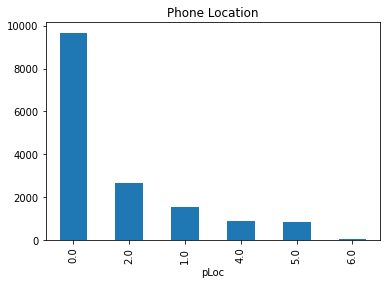

In [9]:
df['pLoc'].value_counts().plot(kind="bar", title='Phone Location')


In [78]:
df['incident'].value_counts()

incident
1    8611
7    3024
5    1313
8    1263
3    1204
4    1004
2     657
6     150
Name: count, dtype: int64

### incident: Type of incident:

- -5 = Dummy incident (if no incident is set, this is created to preserve bike, pLoc, childCheckBox and trailerCheckBox info)
- 0 = Nothing (default value)
- 1 = Close Pass
- 2 = Someone pulling in or out
- 3 = Near left or right hook
- 4 = Someone approaching head on
- 5 = Tailgating
- 6 = Near-Dooring
- 7 = Dodging an obstacle (e.g., a dog)
- 8 = Other (Please specify below)


#### i1-i10 are other participants involved in the incident. 1, if the according type of participant was involved, 0 otherwise.

- i1 = Bus/Coach
- i2 = Cyclist
- i3 = Pedestrian
- i4 = Delivery Van
- i5 = Lorry/Truck
- i6 = Motorcyclist
- i7 = Car
- i8 = Taxi/Cab
- i9 = Other
- i10 = Electric Scooter

In [80]:
# i1 = Bus/Coach
df['i1'].value_counts()

i1
0    16908
1      318
Name: count, dtype: int64

In [82]:
#i2 = Cyclist

df['i2'].value_counts()

i2
0    16222
1     1004
Name: count, dtype: int64

In [84]:
#i3 = Pedestrian

df['i3'].value_counts()

i3
0    16542
1      684
Name: count, dtype: int64

In [86]:
#i4 = Delivery Van

df['i4'].value_counts()

i4
0    15631
1     1595
Name: count, dtype: int64

In [87]:
#i5 = Lorry/Truck

df['i5'].value_counts()

i5
0    16585
1      641
Name: count, dtype: int64

In [88]:
#i6 = Motorcyclist

df['i6'].value_counts()

i6
0    17069
1      157
Name: count, dtype: int64

In [90]:
#i7 = Car

df['i7'].value_counts()

i7
1    10324
0     6902
Name: count, dtype: int64

In [91]:
# i8 = Taxi/Cab

df['i8'].value_counts()

i8
0    16385
1      841
Name: count, dtype: int64

In [92]:
# i9 = Other

df['i9'].value_counts()

i9
0    16922
1      304
Name: count, dtype: int64

- i1 = Bus/Coach  &rarr; 318
- i2 = Cyclist &rarr; 1004
- i3 = Pedestrian  &rarr; 684
- i4 = Delivery Van  &rarr; 1595
- i5 = Lorry/Truck &rarr; 641
- i6 = Motorcyclist &rarr; 157
- i7 = Car &rarr; 6902
- i8 = Taxi/Cab &rarr; 841
- i9 = Other  &rarr; 304
- i10 = Electric Scooter 


- most involved participant ( first 3)
  - car &rarr; 6902
  - Delivery Van  &rarr; 1595
  - Cyclist &rarr; 1004

In [93]:
# i10 = Electric Scooter

df['i10'].value_counts()

i10
0                                                                                                                                                            15881
Berlin                                                                                                                                                        1156
1                                                                                                                                                              120
 Lieferverkehr                                                                                                                                                   9
 Be- und Entladen vor Geschäften                                                                                                                                 3
 wegen Baustelle. trotz stärkerer Abbremsung Aufprall der Felge mit Übergang Kante                                                                               2
 welcher hier fahr

In [103]:
# scary: 1, if the incident was scary, 0 otherwise

df['scary'].value_counts()

scary
0    12410
1     4816
Name: count, dtype: int64

In [113]:
# desc: text description of the incident.

df['desc'] != 'NaN'

0        True
1        True
2        True
3        True
4        True
         ... 
17221    True
17222    True
17223    True
17224    True
17225    True
Name: desc, Length: 17226, dtype: bool